# Práctica Final Master

Jaime Agar Martín

## Lectura de librerías y datos

In [1]:
!pip3 uninstall umap
!pip3 install umap-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

from time import sleep
from random import shuffle

import numpy as np
from numpy import atleast_2d
import pandas as pd

import time
from sklearn.decomposition import PCA, SparsePCA
from sklearn.manifold import TSNE, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KDTree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from umap import UMAP

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, auc, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from IPython import display

In [2]:
df = pd.read_csv(r"C:\Users\agarm\Downloads\NCDB_1999_to_2014.csv", sep = ",")
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


### Vista general de los datos

In [3]:
def get_dataset_statistics(df):
    num_variables = len(df.columns)
    num_observations = len(df)
    missing_cells = df.isnull().sum().sum()
    missing_cells_percentage = (missing_cells / (df.shape[0] * df.shape[1])) * 100
    duplicate_rows = df.duplicated().sum()
    duplicate_rows_percentage = (duplicate_rows / df.shape[0]) * 100
    
    table = pd.DataFrame({
        'Statistic': ['Number of variables', 'Number of observations', 'Missing cells', 'Missing cells (%)', 'Duplicate rows', 'Duplicate rows (%)'],
        'Value': [num_variables, num_observations, missing_cells, f'{missing_cells_percentage:.1f}%', duplicate_rows, f'{duplicate_rows_percentage:.1f}%']
    })
    
    return table

get_dataset_statistics(df)

,Statistic,Value
0,Number of variables,22
1,Number of observations,5860405
2,Missing cells,3
3,Missing cells (%),0.0%
4,Duplicate rows,5069
5,Duplicate rows (%),0.1%


### Tipos de variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


### Valores null

In [5]:
df.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    3
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Podemos ver que no encontramos ningun valor missing dentro del dataset. 
Gracias al diccionario de datos podemos conocer que existen ciertos datos, como los que se reemplazan en el código de abajo, que son datos desconocidos por lo que procedemos a reemplazarlos por valores missing "NA", para poder tratarlos de una manera mas cómoda y sencilla

In [6]:
df = df.replace("UU",np.nan)
df = df.replace("XX",np.nan)
df = df.replace("QQ",np.nan)
df = df.replace("X",np.nan)
df = df.replace("U",np.nan)
df = df.replace("Q",np.nan)
df = df.replace("N",np.nan)
df = df.replace("NN",np.nan)
df = df.replace("NNNN",np.nan)
df = df.replace("UUUU",np.nan)
df = df.replace("XXXX",np.nan)

Procedemos a contar de nuevo los valores nulos

In [7]:
df.isnull().sum()

C_YEAR          0
C_MNTH        385
C_WDAY       1323
C_HOUR      59409
C_SEV           0
C_VEHS        544
C_CONF     463999
C_RCFG     648946
C_WTHR     102988
C_RSUR     248668
C_RALN     463312
C_TRAF     305501
V_ID          433
V_TYPE     283111
V_YEAR     584378
P_ID        10992
P_SEX      249740
P_AGE      395156
P_PSN       97677
P_ISEV     371412
P_SAFE    1234284
P_USER     175586
dtype: int64

Todos estos valores de NA voy a sustituirlos mayoritariamnete por el valor que más aparece en cada columna, es decir, la moda

In [8]:
df['C_RCFG'] = pd.to_numeric(df['C_RCFG'])
df['C_RCFG'].mode()
df['C_RCFG'] = df ['C_RCFG']. fillna(2)
df['C_TRAF'] = pd.to_numeric(df['C_TRAF'])
df['C_TRAF'].mode()
df['C_CONF'] = df ['C_CONF']. fillna(21)
df['C_SEV'] = pd.to_numeric(df['C_SEV'])
df['C_SEV'].mode()
df['C_SEV'] = df ['C_SEV']. fillna(2)
df['C_WTHR'] = pd.to_numeric(df['C_WTHR'])
df['C_WTHR'].mode()
df['C_WTHR'] = df ['C_WTHR']. fillna(1)
df['C_VEHS'] = pd.to_numeric(df['C_VEHS'])
df['C_VEHS'].mode()
df['C_VEHS'] = df ['C_VEHS']. fillna(2)
df['C_RSUR'] = pd.to_numeric(df['C_RSUR'])
df['C_RSUR'].mode()
df['C_RSUR'] = df ['C_RSUR']. fillna(1)
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'])
df['P_ISEV'].mode()
df['P_ISEV'] = df ['P_ISEV']. fillna(2)
df['P_USER'] = pd.to_numeric(df['P_USER'])
df['P_USER'].mode()
df['P_USER'] = df ['P_USER']. fillna(1)

En otra variables los sustituyo por la media

In [9]:
df['V_YEAR'] = pd.to_numeric(df['V_YEAR'])
df['V_YEAR'].mean()
df ['V_YEAR'] = df ['V_YEAR']. fillna(1999)
df['P_AGE'] = pd.to_numeric(df['P_AGE'])
df['P_AGE'].mean()
df ['P_AGE'] = df ['P_AGE']. fillna(37)

In [10]:
df = df.drop(['C_RALN'], axis=1)
df = df.drop(['P_SEX'], axis=1)

Sustituimos los valores NA de "p_safe" por 0 ya que hay una gran cantidad de datos nulos y elimino el resto de valores nulos que quedan

In [11]:
df['P_SAFE'] = df['P_SAFE'].fillna(0)
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,2.0,34,2.0,1.0,5.0,3.0,01,06,1990.0,01,41.0,11,1.0,0,1.0
1,1999,1,1,20,2,2.0,34,2.0,1.0,5.0,3.0,02,01,1987.0,01,19.0,11,1.0,0,1.0
2,1999,1,1,20,2,2.0,34,2.0,1.0,5.0,3.0,02,01,1987.0,02,20.0,13,2.0,02,2.0
3,1999,1,1,08,2,1.0,01,2.0,5.0,3.0,18.0,01,01,1986.0,01,46.0,11,1.0,0,1.0
4,1999,1,1,08,2,1.0,01,2.0,5.0,3.0,18.0,99,NaN,1999.0,01,5.0,99,2.0,0,3.0


In [12]:
df.dropna(inplace=True)
df.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Hay algunos valores que tienen que ser corregidos ya que tienen un valor con un 0 innecesario delante (Por ejemplo 02)

In [13]:
df= df.replace(["01"], ["1"])
df= df.replace(["02"], ["2"])
df= df.replace(["03"], ["3"])
df= df.replace(["04"], ["4"])
df= df.replace(["05"], ["5"])
df= df.replace(["06"], ["6"])
df= df.replace(["07"], ["7"])
df= df.replace(["08"], ["8"])
df= df.replace(["09"], ["9"])
df= df.replace(["00"], ["0"])

Convertimos las variables en numéricas

In [14]:
df['C_MNTH'] = pd.to_numeric(df['C_MNTH'])
df['C_WDAY'] = pd.to_numeric(df['C_WDAY'])
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'])
df['V_ID'] = pd.to_numeric(df['V_ID'])
df['V_TYPE'] = pd.to_numeric(df['V_TYPE'])
df['P_ID'] = pd.to_numeric(df['P_ID'])
df['P_PSN'] = pd.to_numeric(df['P_PSN'])
df['P_PSN'] = pd.to_numeric(df['P_PSN'])
df['P_SAFE'] = pd.to_numeric(df['P_SAFE']) 

Hago un análisis general para comprobar si los datos están correctos

In [15]:
df.shape

(5169676, 20)

In [16]:
df.describe()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
count,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06,5.169676e+06
mean,2.005913e+03,6.706405e+00,4.017527e+00,1.370388e+01,1.983675e+00,2.091161e+00,1.742209e+00,1.597907e+00,1.553326e+00,1.082022e+01,1.549636e+00,2.246210e+00,1.998484e+03,1.463752e+00,3.642002e+01,1.338732e+01,1.578557e+00,1.937017e+00,1.441299e+00
std,4.554788e+00,3.424808e+00,1.935234e+00,5.178951e+00,1.267207e-01,1.302649e+00,7.366993e-01,1.113403e+00,1.083235e+00,8.078013e+00,9.181019e-01,3.600085e+00,6.890211e+00,1.176941e+00,1.777714e+01,8.669344e+00,5.062311e-01,1.945036e+00,8.037806e-01
min,1.999000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.901000e+03,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.002000e+03,4.000000e+00,2.000000e+00,1.000000e+01,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.994000e+03,1.000000e+00,2.200000e+01,1.100000e+01,1.000000e+00,2.000000e+00,1.000000e+00
50%,2.006000e+03,7.000000e+00,4.000000e+00,1.400000e+01,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,1.000000e+00,1.000000e+00,1.999000e+03,1.000000e+00,3.600000e+01,1.100000e+01,2.000000e+00,2.000000e+00,1.000000e+00
75%,2.010000e+03,1.000000e+01,6.000000e+00,1.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.800000e+01,2.000000e+00,1.000000e+00,2.003000e+03,2.000000e+00,4.800000e+01,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00
max,2.014000e+03,1.200000e+01,7.000000e+00,2.300000e+01,2.000000e+00,7.700000e+01,1.000000e+01,7.000000e+00,9.000000e+00,1.800000e+01,8.600000e+01,2.300000e+01,2.015000e+03,9.300000e+01,9.900000e+01,9.800000e+01,3.000000e+00,1.300000e+01,5.000000e+00


Aunque el formato en el que sale los valores de media, mínimos, máximos o cuartiles no es el más claro, se puede ver ninguna irregularidad en las variables (Por ejemplo 2.005949e+03 = 2005,949)

### Correlación

In [17]:
corr = df.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
C_YEAR,1.000000,-0.001279,-0.014042,-0.008995,0.005848,0.006749,-0.022834,0.000076,0.003122,-0.011314,0.006818,0.007243,0.617461,-0.008898,0.059199,0.009602,-0.008047,0.041042,0.007794
C_MNTH,-0.001279,1.000000,0.003544,0.019608,-0.005746,-0.017868,-0.002957,-0.027657,-0.098601,0.000907,-0.012648,0.015516,0.032989,0.000186,0.004341,0.004786,0.000720,0.008957,0.024319
C_WDAY,-0.014042,0.003544,1.000000,-0.012545,-0.018474,-0.019042,-0.018916,0.009196,-0.001502,0.023114,-0.012505,-0.022798,-0.011953,0.053716,-0.049652,0.032987,0.005778,-0.002356,0.053434
C_HOUR,-0.008995,0.019608,-0.012545,1.000000,0.018242,0.019982,0.023659,-0.024117,-0.047772,-0.035947,0.017098,0.007439,-0.011287,0.015758,-0.021218,0.015803,-0.040916,0.010949,0.055890
C_SEV,0.005848,-0.005746,-0.018474,0.018242,1.000000,-0.022981,0.043976,-0.018294,-0.008688,-0.063976,-0.015227,-0.029755,0.008770,-0.032752,-0.010142,-0.027910,-0.148259,-0.008315,-0.017085
C_VEHS,0.006749,-0.017868,-0.019042,0.019982,-0.022981,1.000000,0.017410,0.033426,-0.021865,-0.036753,0.704533,-0.039614,0.032196,0.002568,0.025961,-0.025260,-0.086956,-0.031185,-0.047627
C_RCFG,-0.022834,-0.002957,-0.018916,0.023659,0.043976,0.017410,1.000000,-0.060549,-0.067797,-0.286536,0.014291,0.001727,-0.023307,-0.013644,0.026165,-0.011427,-0.052494,0.004337,-0.000285
C_WTHR,0.000076,-0.027657,0.009196,-0.024117,-0.018294,0.033426,-0.060549,1.000000,0.474027,0.080274,0.021453,-0.039437,0.000677,0.014039,-0.014552,-0.015416,0.038134,-0.018597,-0.054498
C_RSUR,0.003122,-0.098601,-0.001502,-0.047772,-0.008688,-0.021865,-0.067797,0.474027,1.000000,0.110033,-0.018404,-0.039495,-0.000440,0.008543,-0.016286,-0.021627,0.056726,-0.012097,-0.066688
C_TRAF,-0.011314,0.000907,0.023114,-0.035947,-0.063976,-0.036753,-0.286536,0.080274,0.110033,1.000000,-0.030733,0.043895,-0.014404,0.011351,-0.043188,0.020481,0.096412,0.006091,0.024764


Se puede destacar 3 correlaciones entre estas variables:

1.  **C_VEHS - V_ID** = El número de vehículos involucrados en la colisión y el número de secuecia del vehículo guardan una correlacioón de 0.71, la cual es bastante alta. Esto indica que las colisiones que involucran más vehículos tienden a generar una mayor cantidad de información o registros en los informes de accidentes.
1.   **V_YEAR - C_YEAR** = :El año del vehículo y el año en el que se produjo el accidente guarda una correlación de 0,62. A medida que los vehículos envejecen, es más probable que se produzcan accidentes.
2.   **V_TYPE - P_USER** = El tipo de vehículo y y la clase de usuario de la via guardan una correlación de 0.62. Esto se debe a que los diferentes tipos de vehículos suelen estar asociados con una clase particular de usuario de la vía.


## Analisis Descriptivo

In [18]:
df_desc = df.copy()

df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({1:"Light_Duty"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({5:"Cargo_Van"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({6:"Other_Trucks"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({7:"Unit_Trucks"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({8:"Road_Tractor"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({9:"School_Bus"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({10:"Small_Bus"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({11:"Urban_Bus"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({14:"Motorcycle"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({16:"OffRoad_Vehicle"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({17:"Bicycle"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({18:"Build_Motorhome"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({19:"Farm_Equipment"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({20:"Construction_Equipment"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({21:"Fire_Engine"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({22:"Snow_Mobile"})
df_desc["V_TYPE"] = df_desc["V_TYPE"].replace({23:"Car"})



df_desc["C_SEV"] = df_desc["C_SEV"].replace({2:0})


df_desc

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,0,2.0,34,2.0,1.0,5.0,3.0,1,Other_Trucks,1990.0,1,41.0,11,1.0,0,1.0
1,1999,1,1,20,0,2.0,34,2.0,1.0,5.0,3.0,2,Light_Duty,1987.0,1,19.0,11,1.0,0,1.0
2,1999,1,1,20,0,2.0,34,2.0,1.0,5.0,3.0,2,Light_Duty,1987.0,2,20.0,13,2.0,2,2.0
3,1999,1,1,8,0,1.0,1,2.0,5.0,3.0,18.0,1,Light_Duty,1986.0,1,46.0,11,1.0,0,1.0
5,1999,1,1,17,0,3.0,21,2.0,1.0,2.0,1.0,1,Light_Duty,1984.0,1,28.0,11,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,2014,12,7,14,0,2.0,41,1.0,1.0,5.0,18.0,2,Cargo_Van,2008.0,1,44.0,11,1.0,2,1.0
5860377,2014,12,7,14,0,2.0,41,1.0,1.0,5.0,18.0,2,Cargo_Van,2008.0,2,34.0,13,2.0,2,2.0
5860378,2014,12,7,19,0,1.0,3,1.0,1.0,3.0,18.0,1,Light_Duty,2001.0,1,35.0,11,2.0,2,1.0
5860379,2014,12,7,19,0,1.0,3,1.0,1.0,3.0,18.0,1,Light_Duty,2001.0,2,26.0,13,1.0,2,2.0


Por tipo de vehículo

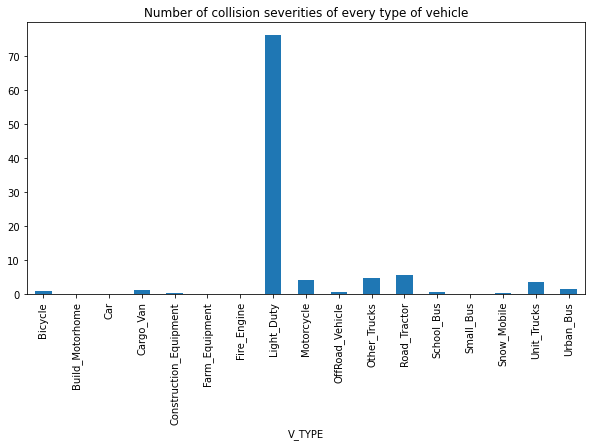

In [19]:
SEV_df = df_desc.groupby(df_desc["V_TYPE"])["C_SEV"].sum() / df_desc["C_SEV"].sum() * 100
plt.figure(figsize=(10, 5))
plot = SEV_df.plot(kind="bar", title="Number of collision severities of every type of vehicle")

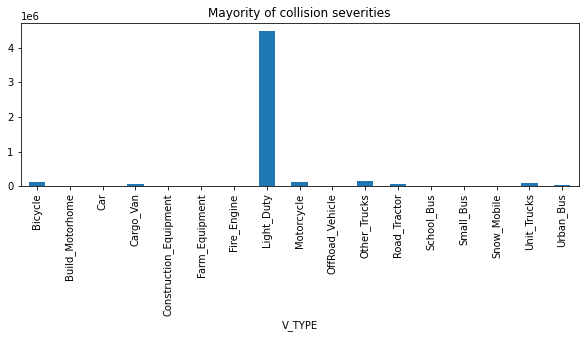

In [20]:
SEV_df2 = df_desc.groupby(df_desc["V_TYPE"])["C_SEV"].count()
plt.figure(figsize=(10, 3))
plot = SEV_df2.plot(kind="bar", title="Mayority of collision severities")

Por la hora

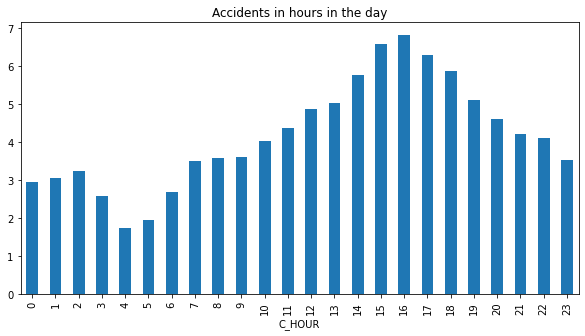

In [21]:
HOUR_df = df_desc.groupby(df_desc["C_HOUR"])["C_SEV"].sum() / df_desc["C_SEV"].sum() * 100
plt.figure(figsize=(10, 5))
plot = HOUR_df.plot(kind="bar", title="Accidents in hours in the day")

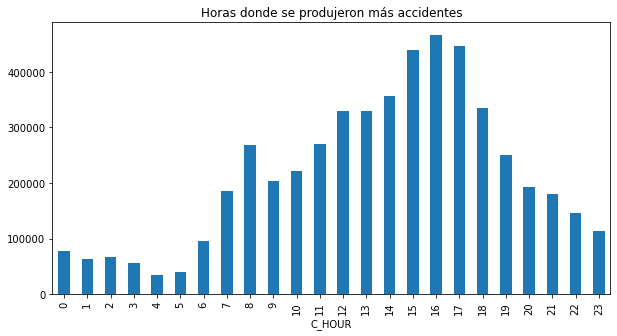

In [22]:
HOUR_df2 = df_desc.groupby(df_desc["C_HOUR"])["C_SEV"].count()
plt.figure(figsize=(10, 5))
plot = HOUR_df2.plot(kind="bar", title="Horas donde se produjeron más accidentes")

Con estos dos gráficos se puede ver que en las primeras horas de la tarde son las horas con más accidentes, incluyendo los mortales, especialmente a las 15:00.

Por la edad del vehúclo

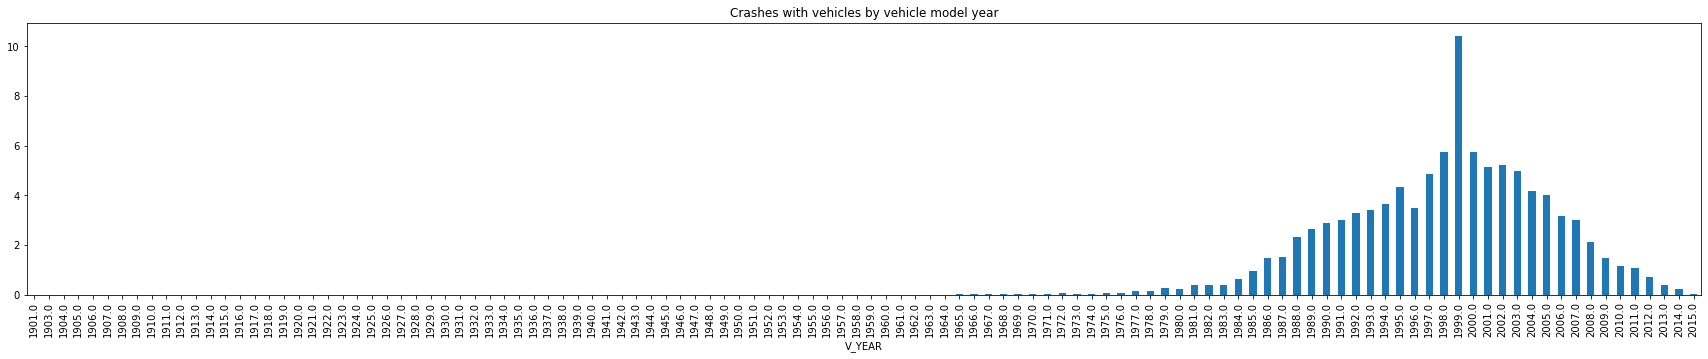

In [23]:
VYEAR_df = df_desc.groupby(df_desc["V_YEAR"])["C_SEV"].sum() / df_desc["C_SEV"].sum() * 100
plt.figure(figsize=(30, 5))
plot = VYEAR_df.plot(kind="bar", title="Crashes with vehicles by vehicle model year")

Por edad

Primero filtramos la variable P_PSN con el valor 11, que es el valor para el conductor.

In [24]:
df_desc_conductor = df.loc[df_desc["P_PSN"] == 11]
df_desc_conductor

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,2.0,34,2.0,1.0,5.0,3.0,1,6,1990.0,1,41.0,11,1.0,0,1.0
1,1999,1,1,20,2,2.0,34,2.0,1.0,5.0,3.0,2,1,1987.0,1,19.0,11,1.0,0,1.0
3,1999,1,1,8,2,1.0,1,2.0,5.0,3.0,18.0,1,1,1986.0,1,46.0,11,1.0,0,1.0
5,1999,1,1,17,2,3.0,21,2.0,1.0,2.0,1.0,1,1,1984.0,1,28.0,11,1.0,0,1.0
6,1999,1,1,17,2,3.0,21,2.0,1.0,2.0,1.0,2,1,1991.0,1,21.0,11,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860371,2014,12,7,21,2,2.0,35,3.0,2.0,1.0,18.0,2,17,1999.0,1,27.0,11,2.0,0,4.0
5860372,2014,12,7,0,2,1.0,4,1.0,2.0,2.0,18.0,1,1,1994.0,1,49.0,11,2.0,2,1.0
5860373,2014,12,7,18,2,1.0,2,1.0,2.0,5.0,18.0,1,1,2010.0,1,20.0,11,1.0,2,1.0
5860376,2014,12,7,14,2,2.0,41,1.0,1.0,5.0,18.0,2,5,2008.0,1,44.0,11,1.0,2,1.0


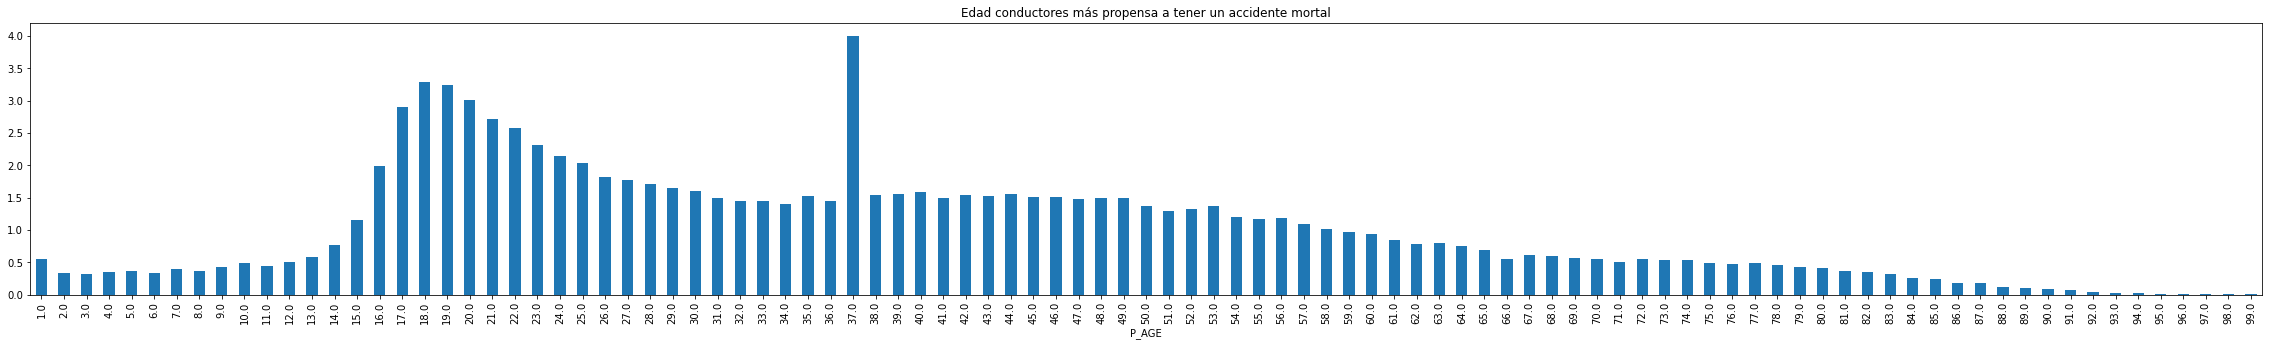

In [25]:
AGE_df = df_desc.groupby(df_desc["P_AGE"])["C_SEV"].sum() / df_desc["C_SEV"].sum() * 100
plt.figure(figsize=(40, 5))
plot = AGE_df.plot(kind="bar", title="Edad conductores más propensa a tener un accidente mortal")

In [26]:
df_desc["P_SAFE"] = df_desc["P_SAFE"].replace({1.0:"No_safety_Device_Used"})
df_desc["P_SAFE"] = df_desc["P_SAFE"].replace({2.0:"Safety_Device_Used"})
df_desc["P_SAFE"] = df_desc["P_SAFE"].replace({9.0:"Helmet"})
df_desc["P_SAFE"] = df_desc["P_SAFE"].replace({10.0:"Reflecting_Clothing"})
df_desc["P_SAFE"] = df_desc["P_SAFE"].replace({11.0:"Helmet_Reflecting"})
df_desc["P_SAFE"] = df_desc["P_SAFE"].replace({12.0:"Other"})
df_desc["P_SAFE"] = df_desc["P_SAFE"].replace({13.0:"No_Safety_Deviced_Equipped"})
df_desc["P_SAFE"] = df_desc["P_SAFE"].replace({0.0:"No_Info"})

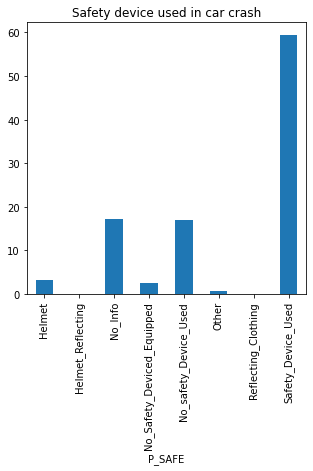

In [27]:
SAFE_df = df_desc.groupby(df_desc["P_SAFE"])["C_SEV"].sum() / df_desc["C_SEV"].sum() * 100
plt.figure(figsize=(5, 5))
plot = SAFE_df.plot(kind="bar", title="Safety device used in car crash")

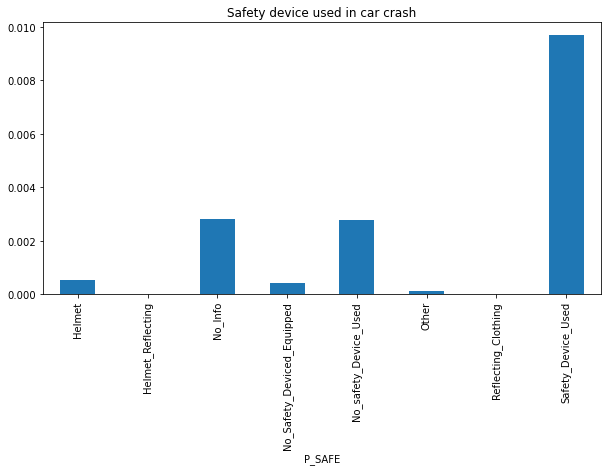

In [28]:
SAFE_df2 = df_desc.groupby(df_desc["P_SAFE"])["C_SEV"].sum() / df_desc["C_SEV"].count()
plt.figure(figsize=(10, 5))
plot = SAFE_df2.plot(kind="bar", title="Safety device used in car crash")

Por clima

In [29]:
df_desc["C_WTHR"] = df_desc["C_WTHR"].replace({1.0:"Clear and sunny"})
df_desc["C_WTHR"] = df_desc["C_WTHR"].replace({2.0:"Overcast, cloudy but no precipitation"})
df_desc["C_WTHR"] = df_desc["C_WTHR"].replace({3.0:"Rainning"})
df_desc["C_WTHR"] = df_desc["C_WTHR"].replace({4.0:"Snowing"})
df_desc["C_WTHR"] = df_desc["C_WTHR"].replace({5.0:"Freezing rain / hail"})
df_desc["C_WTHR"] = df_desc["C_WTHR"].replace({6.0:"Visibility limitation"})
df_desc["C_WTHR"] = df_desc["C_WTHR"].replace({7.0:"Strong wind"})

In [30]:
CWTHR_df  = df_desc.groupby('C_WTHR')['C_SEV'].value_counts(normalize=True).unstack()

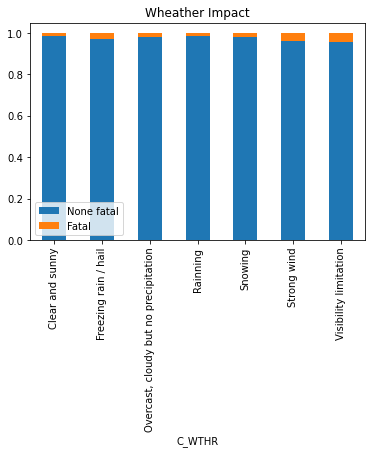

In [31]:
CWTHR_df.plot(kind='bar', stacked=True)

plt.title('Wheather Impact')
plt.legend(['None fatal', 'Fatal'])

plt.show()

## Elección de los modelos

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns=['C_SEV']), df['C_SEV'], test_size=0.20, random_state=0)

In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)

## KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, ytrain)

KNeighborsClassifier()

In [ ]:
ypred_knn= knn.predict(x_test_scaled)

In [ ]:
y_pred_proba_knn = knn.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_knn[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_knn)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_knn)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_knn)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_knn))/np.sum(confusion_matrix(ytest, ypred_knn),axis = 1).reshape(-1,1),2))


## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, ytrain)

In [ ]:
ypred_rf = rf.predict(x_test_scaled)

In [ ]:
y_pred_proba_rf = rf.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_rf[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_rf)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_rf)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_rf)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_rf))/np.sum(confusion_matrix(ytest, ypred_rf),axis = 1).reshape(-1,1),2))

## Regresión Logística

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train_scaled, ytrain)

In [ ]:
ypred_lr = lr.predict(x_test_scaled)

In [ ]:
y_pred_proba_lr = lr.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_lr[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_lr)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_lr)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_lr)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_lr))/np.sum(confusion_matrix(ytest, ypred_lr),axis = 1).reshape(-1,1),2))


## Bagging clasifier

In [ ]:
bc = BaggingClassifier(random_state=42)
bc.fit(x_train_scaled, ytrain)

In [ ]:
ypred_bc = bc.predict(x_test_scaled)

In [ ]:
y_pred_proba_bc = bc.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_bc[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_bc)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_bc)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_bc)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_bc))/np.sum(confusion_matrix(ytest, ypred_bc),axis = 1).reshape(-1,1),2))

## Arbol de Decisión

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_scaled, ytrain)

In [ ]:
ypred_dtree = dtree.predict(x_test_scaled)

In [ ]:
y_pred_proba_dtree = dtree.predict_proba(x_test_scaled)

In [ ]:
print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, y_pred_proba_dtree[:, 1])))
print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred_dtree)))
print('Classification report: \n{}\n'.format(classification_report(ytest, ypred_dtree)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred_dtree)))
print('Confusion matrix normalizada: \n{}\n'.format((confusion_matrix(ytest, ypred_dtree))/np.sum(confusion_matrix(ytest, ypred_dtree),axis = 1).reshape(-1,1)))
   